In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
from matplotlib.colors import LogNorm, Normalize
from scipy.signal import butter, lfilter, freqz,detrend



# Constants

## Radar constants

In [2]:
B = 194e6 # Sweep Bandwidth 
T =  1/B # Sweep Time
N = 256 # Sample Length
CPI =N*T # Coherent Processing Interval (CPI)
M = 4 # ignored samples
L = 256 # Chirp Total
c = 299792458 # Speed ​​of Light
f0 = 24028e6 # Start Frequency
f_R = 24.125e9 # freq radar
clk = 38461538 #Core clock
S_clk = 12 # Core clocks per sample
delay = 11106 #Initial delay

wave_length = c/f_R

NumRangeFFT = 256 # Range FFT Length
NumDopplerFFT = 256 # Doppler FFT Length

# Range
rangeRes = 150e6*(N+M)/(N*B) # Range Resolution
maxRange = (N-1)*rangeRes # Max Range
#speed
velRes = wave_length*clk/(2*N*(S_clk*(N+M)+delay)) # Velocity Resolution
maxVel = velRes * (N/2-1) # Max Velocity
print("Coherent Processing Interval (CPI): ", CPI)
print("Pulse length: ", T)
print("Wave length: ", wave_length)
print("Range Resolution: ", rangeRes)
print("Velocity Resolution: ", velRes*3.6, "km/h")
print("Max Range: ", maxRange)
print("Max Velocity: ", maxVel*3.6, "km/h")


Coherent Processing Interval (CPI):  1.3195876288659794e-06
Pulse length:  5.154639175257732e-09
Wave length:  0.01242663038341969
Range Resolution:  0.7852770618556701
Velocity Resolution:  0.23622712431983353 km/h
Max Range:  200.24565077319588
Max Velocity:  30.000844788618856 km/h


In [3]:
print(c/2/f_R/T/NumDopplerFFT*3.6)

16950.70050738342


In [111]:
c = 3*10**8 # speed of ligth
f_0 = 24.125*10**9 # frequenzy of radar
w = c / f_0 # wavelength
v = 30/3.6 # max speed mesurabol by radar
f_max = v*2/w*2 # max frequenzy mesurabol by radar
clk = 38461538 # clock frekuenzy
s_clk =12 #clocks pr sample
sample_bandwidth  = 191.0153846e6
sample_frek = 2*sample_bandwidth # sample frekuenzy
frame_rate =50*10**(-3) # frame rate
sample_per_frame = 260*257 # sample pr frame
sample_period_new = frame_rate / sample_per_frame # sample period
fs_new = 1/sample_period_new # sample frekuenzy 

In [118]:
# Infor rom rfbeam
sample_bandwidth  = 191.0153846e6
sample_frek = 2*sample_bandwidth # sample frekuenzy
frame_rate =50*10**(-3) # frame rate
sample_per_frame = 260*257 # sample pr frame
c_t = (1/sample_bandwidth )*256 # sample period
fs_new = 1/sample_period_new # sample frekuenzy 

In [119]:
print("sample frekuenzy: ", sample_frek)
print("ramp frekuenzy: ", c_t)

sample frekuenzy:  382030769.2
ramp frekuenzy:  1.3402061856749523e-06


# Step 1: Read in the data

In [1]:
try:
    with open("felttest2/Record_2022-09-28_14-48-46/Record_2022-09-28_14-48-46.bin", "rb") as f:
        data = f.read()
    
        
        
except IOError as e:
    print(e)

# Seperate the difffrent frames

        







In [71]:
import re
stri = "DONE"

test =re.search(stri.encode(), data).end()


In [72]:
done = False
data_arr = []
index = 0
data_bytes = data
while(not done):
    ls = re.search(stri.encode(), data).end()
    data_arr.append(data_bytes[:ls])
    data_bytes = data_bytes[ls:]
    print(len(data_bytes))
    if(len(data_bytes) == 0):
        done = True
     


606405012
605355852
604306692
603257532
602208372
601159212
600110052
599060892
598011732
596962572
595913412
594864252
593815092
592765932
591716772
590667612
589618452
588569292
587520132
586470972
585421812
584372652
583323492
582274332
581225172
580176012
579126852
578077692
577028532
575979372
574930212
573881052
572831892
571782732
570733572
569684412
568635252
567586092
566536932
565487772
564438612
563389452
562340292
561291132
560241972
559192812
558143652
557094492
556045332
554996172
553947012
552897852
551848692
550799532
549750372
548701212
547652052
546602892
545553732
544504572
543455412
542406252
541357092
540307932
539258772
538209612
537160452
536111292
535062132
534012972
532963812
531914652
530865492
529816332
528767172
527718012
526668852
525619692
524570532
523521372
522472212
521423052
520373892
519324732
518275572
517226412
516177252
515128092
514078932
513029772
511980612
510931452
509882292
508833132
507783972
506734812
505685652
504636492
503587332
502538172


# Step 2: RADC

fetch and format the RADC data

In [73]:
len(data_arr)

579

TYPE:  RADC
length: 786432
786432
262144
262144
262144


<Figure size 1000x1000 with 0 Axes>

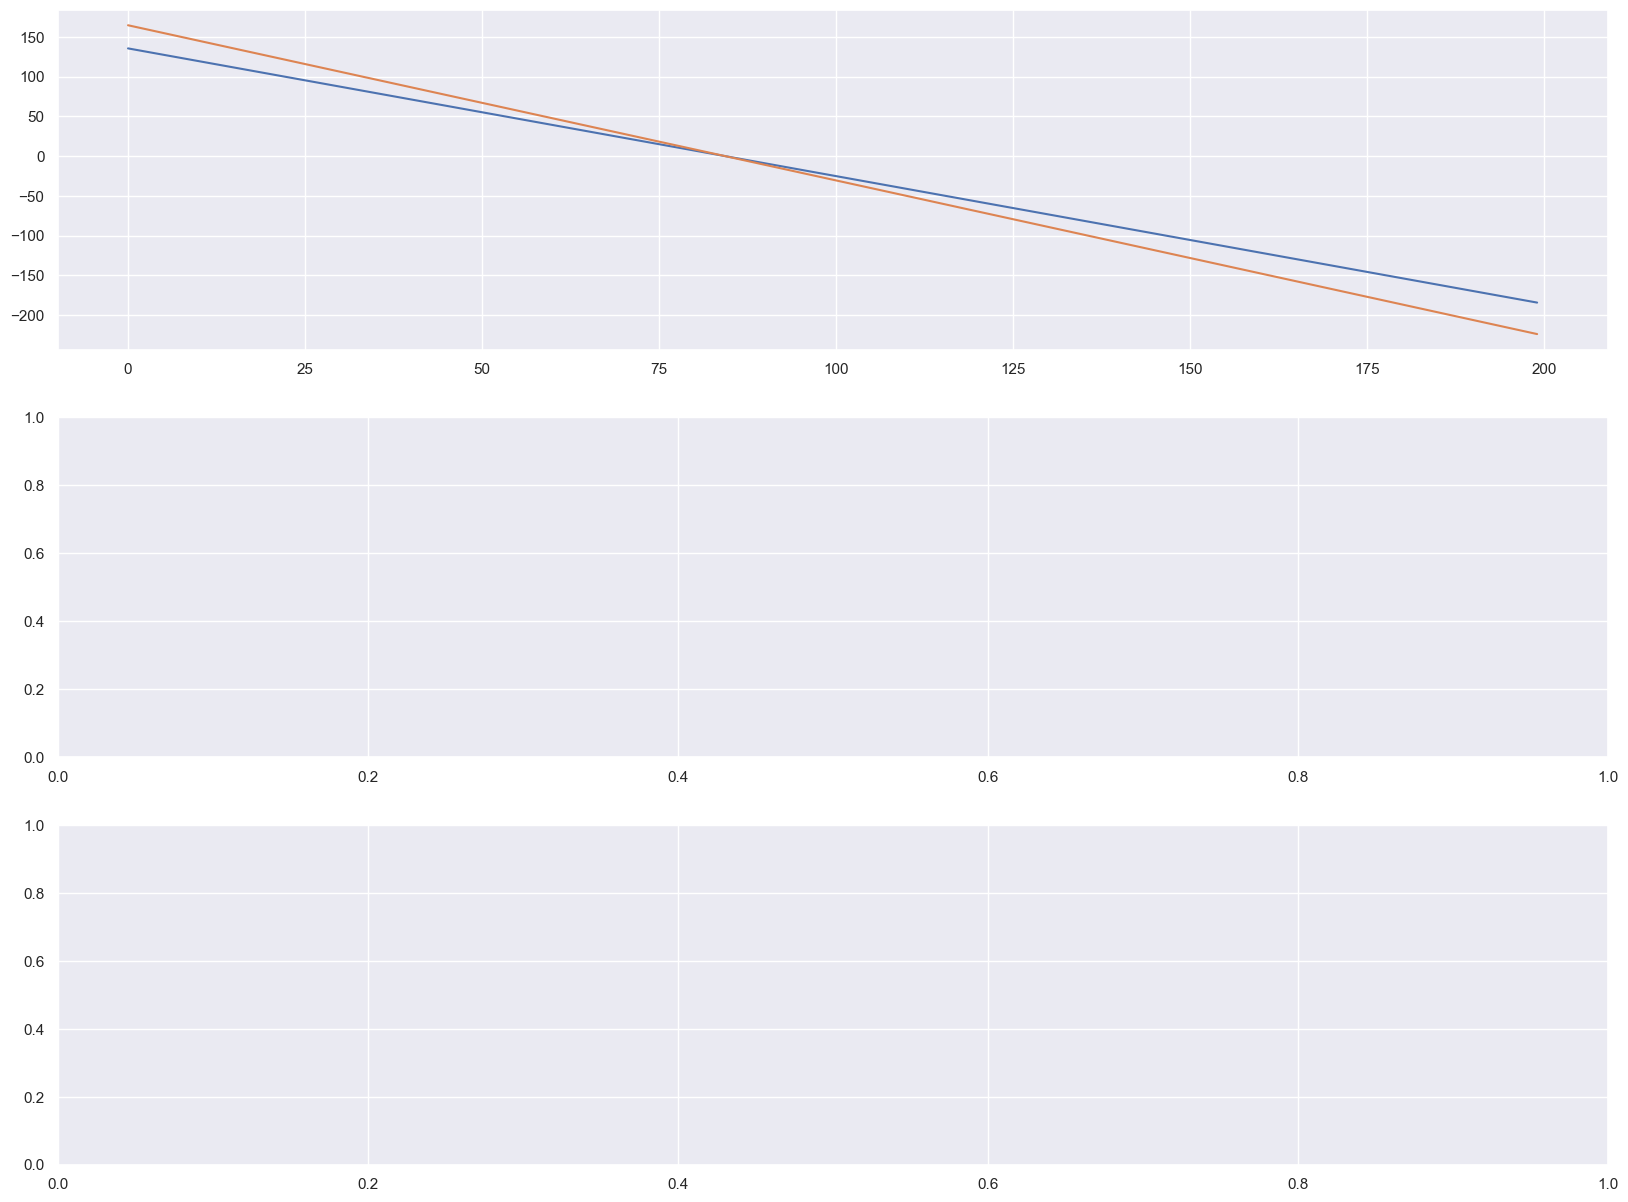

In [109]:
data_type = data_arr[:4].decode()
print("TYPE: ", data_type)
length = int.from_bytes(
    data[4:8], byteorder="little", signed=False)
print("length:", length)
data_RADC = data[8:8+length]
print(len(data_RADC))
data_rx1 = data_RADC[:262144]
test_save = data_rx1
data_rx2 = data_RADC[262144:262144*2]
data_rx3 = data_RADC[262144*2:262144*3]
print(len(data_rx1))
print(len(data_rx2))
print(len(data_rx3))
data_RADC_rx1 = np.frombuffer(data_rx1,dtype=np.uint16)
test_save = data_RADC_rx1
data_RADC_rx2 = np.frombuffer(data_rx2,dtype=np.uint16)
data_RADC_rx3 = np.frombuffer(data_rx3,dtype=np.uint16)
data_RADC_rx1 = data_RADC_rx1.reshape(256,2,256)

data_RADC_rx1 = detrend(data_RADC_rx1, axis=2)
#data_RADC_rx2 = data_RADC_rx2.reshape(256,2,256)
data_RADC = np.frombuffer(data_RADC,dtype=np.uint16)
data_RADC = data_RADC.reshape(3,256,512)
data_RADC_I = data_RADC[:,:,::2]
data_RADC_Q = data_RADC[:,:,1::2]
data_RADC_I = detrend(data_RADC_I, axis=2)
data_RADC_Q = detrend(data_RADC_Q, axis=2)
plt.figure(figsize=(10,10))
fig, axs = plt.subplots(3, 1)
axs[0].plot(data_RADC_I[0,0,:200])
axs[0].plot(data_RADC_Q[0,0,:200])
# axs[1].plot(data_RADC_rx1[0,0,:])
# axs[1].plot(data_RADC_rx1[0,1,:])
# axs[2].plot(data_RADC[2,10,0,:])
# axs[2].plot(data_RADC[2,10,1,:])

plt.show()

### Test of formatting

In [ ]:
data_formated = np.zeros((256,2,128))
for i in range(0,256*2*256,256*2):
    slice_v = int(i/(256*2))
    
    data_I = test_save[i:i+256]
    data_Q = test_save[i+256:i+256*2]
    data_formated[slice_v,0,:] = data_I[:128]
    data_formated[slice_v,1,:] = data_Q[:128]


In [ ]:
data_formated_2 = []
data_formated_2 = np.array(data_formated_2)
print(data_formated_2.shape)
for i in range(0,256*2*256,256*2):
    slice_v = int(i/(256*2))
    
    data_I = test_save[i:i+256]
    data_Q = test_save[i+256:i+256*2]
    data_formated_2= np.concatenate((data_formated_2 ,data_I[:128], data_Q[:128]), axis=None)
data_formated_2 = data_formated_2.reshape(256,2,128)

(0,)


In [ ]:
df = pd.DataFrame(data_formated_2[:,0,:])
df

0        1        2        3        4        5        6        7    \
0    33056.0  32688.0  33616.0  32784.0  33568.0  32672.0  34144.0  32080.0   
1    32944.0  32768.0  33456.0  32976.0  33936.0  32608.0  33808.0  31920.0   
2    32800.0  32784.0  33680.0  33168.0  33904.0  32512.0  34112.0  32144.0   
3    33088.0  32784.0  33776.0  33264.0  34064.0  32800.0  33584.0  32512.0   
4    33056.0  32944.0  33552.0  33200.0  33712.0  32656.0  33312.0  32512.0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
251  33328.0  32784.0  33856.0  32624.0  33616.0  32848.0  33664.0  32320.0   
252  33168.0  32672.0  33712.0  32832.0  33408.0  32608.0  33328.0  32224.0   
253  33088.0  32784.0  33808.0  32704.0  33632.0  32576.0  33760.0  32320.0   
254  32864.0  32656.0  33664.0  33008.0  33520.0  32576.0  33712.0  32288.0   
255  33024.0  32704.0  33632.0  32976.0  33536.0  32560.0  33760.0  32352.0   

         8        9    ...      118      119      120      121      122  \
0    34288.0  32480.0  ...  34672.0  33472.0  34448.0  33168.0  33600.0   
1    34320.0  32048.0  ...  34192.0  33760.0  34304.0  33264.0  33840.0   
2    33952.0  32512.0  ...  34464.0  33216.0  34288.0  33168.0  33552.0   
3    34080.0  32304.0  ...  34944.0  33584.0  34064.0  33120.0  33504.0   
4    33744.0  32160.0  ...  34896.0  33536.0  34672.0  33440.0  33776.0   
..       ...      ...  ...      ...      ...      ...      ...      ...   
251  33792.0  32192.0  ...  34464.0  33552.0  34368.0  33120.0  33536.0   
252  34208.0  31696.0  ...  34688.0  33680.0  34160.0  33184.0  33952.0   
253  34448.0  32192.0  ...  34624.0  33440.0  34064.0  33200.0  33920.0   
254  34144.0  32176.0  ...  34800.0  33584.0  33824.0  33344.0  33600.0   
255  34000.0  32432.0  ...  34480.0  33520.0  34144.0  33120.0  34048.0   

         123      124      125      126      127  
0    33360.0  33616.0  32688.0  33776.0  33072.0  
1    33216.0  33440.0  32880.0  33712.0  32992.0  
2    33360.0  33808.0  32816.0  33472.0  32784.0  
3    33200.0  33776.0  32800.0  33360.0  32928.0  
4    33232.0  34160.0  32720.0  33232.0  32848.0  
..       ...      ...      ...      ...      ...  
251  33040.0  33456.0  32608.0  33216.0  32896.0  
252  33408.0  33520.0  32848.0  33472.0  32592.0  
253  33344.0  33280.0  32656.0  33424.0  32944.0  
254  33488.0  33600.0  32752.0  33776.0  32848.0  
255  33136.0  33392.0  32672.0  33456.0  33120.0  

[256 rows x 128 columns]

# FFT

In [ ]:
from numpy import sort


def fft_filter(data, sample_period,plot=False):
    """
    This function takes a data matrix and filters it with a frequency range.
    :param data:
    :param sample_period:
    :param freq_range:
    :return:
    """

    # Generate frequency axis and take FFT
    spectrum = np.fft.fft(data, 256,axis=0)  # takes FFT of all channels withe zero padding
    #spectrum = np.trim_zeros(spectrum, trim='fb')
    power_spectrum = 20*np.log10(np.abs(spectrum))
    num_of_samples = data.shape[0]  # returns shape of matrix
   
    freq = np.fft.fftfreq(n=len(data))
    freq = np.fft.fftshift(freq,)
    power_spectrum = np.fft.fftshift(power_spectrum)
    sorted = np.argsort(power_spectrum)
    df = pd.DataFrame(freq[sorted])
    print(df)
    print("Max freq bin:",freq[np.argmax(power_spectrum[130:])])
    if plot:
        plt.figure(figsize=(15, 5))
        plt.plot(freq,power_spectrum)
        #plt.xlim(-0.01,0.01)
        
        plt.show()
    
    return power_spectrum, freq

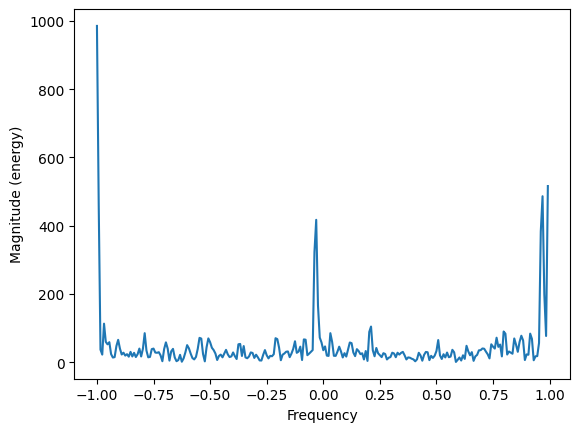

In [ ]:
plt.magnitude_spectrum(data_RADC[0,10,0,:]+1j*data_RADC[0,15,1,:])
#plt.xlim(-10000,0)
plt.show()

In [ ]:
def angle_freq_to_velocity(w):
    return w*c/(4*np.pi*f_0)

In [ ]:
angle_freq_to_velocity(2*np.pi*4000)

NameError: name 'c' is not defined

# RMRD
fetch and format the RMRD data


TYPE:  RMRD
length: 262144
76847
2176


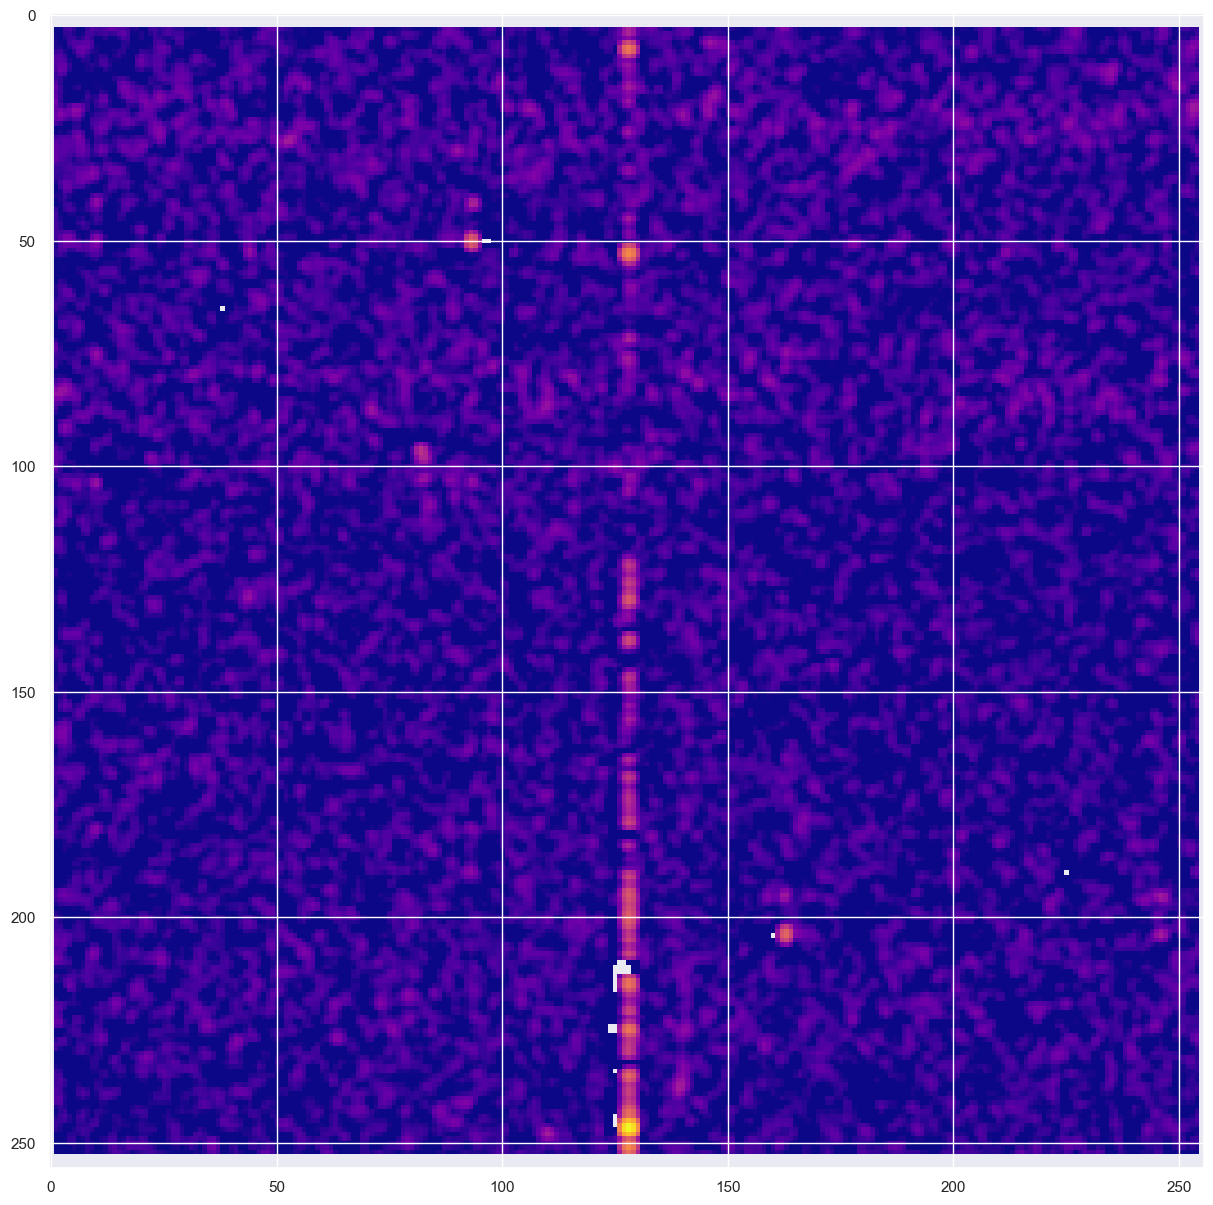

In [ ]:
data_type = data[8+length:8+length+4].decode()
print("TYPE: ", data_type)
length_2 = int.from_bytes(
    data[8+length+4:8+length+4+4], byteorder="little", signed=False)
print("length:", length_2)
data_RMRD = data[8+length+8:8+length+8+length_2]
data_RMRD = np.frombuffer(data_RMRD,dtype=np.uint32)
    
    

    
data_RMRD = data_RMRD.reshape(256,256)
print(np.max(data_RMRD))
print(np.argmax(data_RMRD))
data_RMRD = np.flip(data_RMRD, axis=0)
plt.imshow(data_RMRD, cmap='plasma',norm=LogNorm(vmin=100))
plt.show()

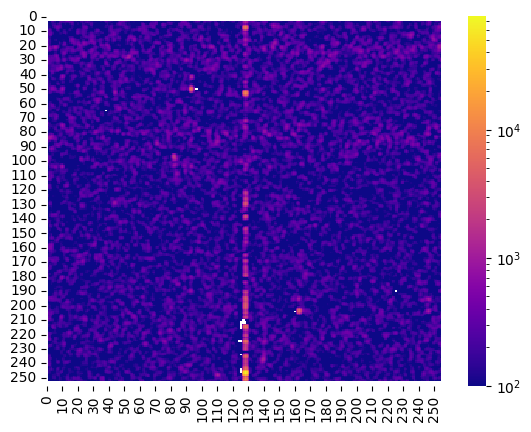

In [ ]:


ax = sns.heatmap(data_RMRD,norm =LogNorm(vmin=100),cmap='plasma')

# Step 4: Doppler processing

## Create the doppler matrix

Each row equals one chirp.
we therfor first need to take the fft of axis 1 (the chirps) and then the fft of axis 0 (the samples)

In [96]:
data_IF = data_RADC_I[:,:,:] + 1j*data_RADC_Q[:,:,:]
data_IF = np.mean(data_IF, axis=0)
print(data_IF.shape)
df =pd.DataFrame(data_IF)
df

(256, 256)


0                        1    \
0    115.6889900+28.4453630j   20.8240270-35.5450580j   
1    179.6588640+39.2196820j  69.45090900-8.80818500j   
2    227.2527560+68.5332360j   83.7751200+95.1968640j   
3     82.9677370+15.5869000j   174.1751709-5.6742390j   
4    1356.302428+745.764531j  1320.736596+648.642940j   
..                       ...                      ...   
251   807.629864+127.773508j   905.579335+123.548978j   
252   839.677853+102.925584j  671.0228640-66.5885390j   
253  840.8727300+42.5976010j  752.1925190+91.8353970j   
254  906.8602460+73.5758750j  695.5832380-15.8448180j   
255  879.2446500-53.1645590j  603.8942020-19.9962750j   

                         2                        3    \
0    108.6257310+23.1311880j  239.4274350+49.8074330j   
1     110.909620-184.836051j   200.701664+156.469415j   
2    180.2974840+41.8604920j   95.4865150+47.1907870j   
3    169.3826220+58.3979550j -6.076602-0069.52985000j   
4    1253.170764+567.521349j  1190.938265+513.066425j   
..                       ...                      ...   
251   779.528807+119.324447j   568.144945+221.766583j   
252  779.7012070+78.5640060j   573.712884+133.049884j   
253   556.8456402+7.7398600j  484.1654310+88.9776570j   
254  750.9728960+81.4011560j  561.0292210+55.9804630j   
255  733.8770870+66.5053430j   719.859972+185.006960j   

                         4                        5    \
0     45.5624720+92.4836790j   45.3641760+23.1599240j   
1   -0.172958+0017.77488200j   29.2857530+23.0803480j   
2    117.3422120+36.5210820j  -63.4687570+79.1847100j   
3     63.7975070-37.4576560j  107.0049500-74.7187950j   
4    1096.705767+591.944835j  1071.806601+473.489911j   
..                       ...                      ...   
251   372.761084+196.208719j   657.377222+127.984188j   
252   378.391228+208.869095j   609.736238+162.021639j   
253   736.818553+228.882120j   637.471675+176.786584j   
254   717.752213+115.893103j   506.475204+117.139076j   
255   625.842857+218.175244j  467.8257420+86.0101950j   

                         6                       7                       8    \
0    -32.1674530+71.1695030j   5.967584+028.5124150j  70.4359550+97.8553270j   
1     58.7444640+60.3858150j   164.536509+17.691281j  5.328553+0118.9967480j   
2    38.38694000-6.15166100j -67.7573620+36.5119670j -19.2349980+63.1755950j   
3     235.545726+101.353399j   145.419835+58.758927j -35.3727230+10.8311210j   
4    1078.907436+413.701653j  958.008271+407.246729j  879.775772+395.458472j   
..                       ...                     ...                     ...   
251  472.6600270+38.4263240j   431.942832+39.535126j   401.892304+19.310595j   
252   606.414582+125.840850j   453.759592+84.326728j   189.104603+69.479273j   
253  463.4581310+39.3577130j   449.444587+77.928843j   302.097709+25.833307j   
254   583.198196+113.051717j   254.587854-19.035643j  443.310845+163.543664j   
255  512.4752940+55.1784790j   413.124846+77.680097j   436.441064+78.848381j   

                        9    ...                       246  \
0    131.237659+113.864906j  ...   295.5748410-11.8649060j   
1   -12.2127360-57.0311190j  ...   349.5017980-26.3022140j   
2     39.954032+111.172557j  ...   441.0876340-12.2142230j   
3    -2.831947-015.7633520j  ...   429.3319470-14.6533150j   
4    796.209940+266.336881j  ...  2889.774435+2037.853223j   
..                      ...  ...                       ...   
251   409.175109+52.419398j  ...   1180.533225+181.872269j   
252  223.116279+145.298484j  ...   1494.550387+210.451516j   
253  330.750832+107.071103j  ...   1324.207502+208.428897j   
254  306.700504+111.456304j  ...   1551.382830+166.752029j   
255   470.423949+58.683331j  ...   1041.701051+266.233335j   

                          247                       248  \
0     373.0432120-11.8553270j   386.8449160-22.5124150j   
1     563.6271760+80.3365850j   399.0858870-74.3579480j   
2    409.60999008-1.55059500j   410.1323620+41.1130330j   
3     445.8727230+17.4188790

In [97]:

data_IF_test = data_formated_2[:,0,:] + 1j*data_formated_2[:,1,:]
print(data_IF_test.shape)
df =pd.DataFrame(data_IF_test)
df

(256, 128)


0                 1                 2                 3    \
0    33056.0+33760.0j  32688.0+32640.0j  33616.0+32704.0j  32784.0+32496.0j   
1    32944.0+33440.0j  32768.0+33024.0j  33456.0+32512.0j  32976.0+32368.0j   
2    32800.0+33440.0j  32784.0+32928.0j  33680.0+32336.0j  33168.0+32720.0j   
3    33088.0+33040.0j  32784.0+32848.0j  33776.0+32432.0j  33264.0+32624.0j   
4    33056.0+32976.0j  32944.0+33056.0j  33552.0+33152.0j  33200.0+32432.0j   
..                ...               ...               ...               ...   
251  33328.0+33632.0j  32784.0+33072.0j  33856.0+33104.0j  32624.0+32528.0j   
252  33168.0+33520.0j  32672.0+32880.0j  33712.0+32976.0j  32832.0+32432.0j   
253  33088.0+33616.0j  32784.0+32752.0j  33808.0+32880.0j  32704.0+32272.0j   
254  32864.0+33600.0j  32656.0+32784.0j  33664.0+32800.0j  33008.0+32416.0j   
255  33024.0+33664.0j  32704.0+33072.0j  33632.0+32848.0j  32976.0+32400.0j   

                  4                 5                 6                 7    \
0    33568.0+32448.0j  32672.0+32608.0j  34144.0+32544.0j  32080.0+31968.0j   
1    33936.0+32272.0j  32608.0+32576.0j  33808.0+32480.0j  31920.0+32016.0j   
2    33904.0+32352.0j  32512.0+32560.0j  34112.0+32640.0j  32144.0+32096.0j   
3    34064.0+32288.0j  32800.0+32480.0j  33584.0+33136.0j  32512.0+31760.0j   
4    33712.0+32656.0j  32656.0+32896.0j  33312.0+32928.0j  32512.0+32032.0j   
..                ...               ...               ...               ...   
251  33616.0+32880.0j  32848.0+32272.0j  33664.0+32448.0j  32320.0+31920.0j   
252  33408.0+32656.0j  32608.0+32784.0j  33328.0+32832.0j  32224.0+31760.0j   
253  33632.0+32240.0j  32576.0+32608.0j  33760.0+32736.0j  32320.0+31744.0j   
254  33520.0+32560.0j  32576.0+32448.0j  33712.0+32336.0j  32288.0+32192.0j   
255  33536.0+32256.0j  32560.0+32704.0j  33760.0+32320.0j  32352.0+32144.0j   

                  8                 9    ...               118  \
0    34288.0+34064.0j  32480.0+32240.0j  ...  34672.0+32016.0j   
1    34320.0+34096.0j  32048.0+31936.0j  ...  34192.0+32240.0j   
2    33952.0+34000.0j  32512.0+32400.0j  ...  34464.0+32256.0j   
3    34080.0+33856.0j  32304.0+32464.0j  ...  34944.0+32000.0j   
4    33744.0+34112.0j  32160.0+31744.0j  ...  34896.0+32352.0j   
..                ...               ...  ...               ...   
251  33792.0+33568.0j  32192.0+32224.0j  ...  34464.0+32272.0j   
252  34208.0+33632.0j  31696.0+32576.0j  ...  34688.0+32288.0j   
253  34448.0+33728.0j  32192.0+32704.0j  ...  34624.0+32032.0j   
254  34144.0+34176.0j  32176.0+32288.0j  ...  34800.0+32384.0j   
255  34000.0+34080.0j  32432.0+32224.0j  ...  34480.0+32464.0j   

                  119               120               121               122  \
0    33472.0+33216.0j  34448.0+32208.0j  33168.0+32896.0j  33600.0+32688.0j   
1    33760.0+33360.0j  34304.0+32272.0j  33264.0+33008.0j  33840.0+32832.0j   
2    33216.0+33584.0j  34288.0+32352.0j  33168.0+32768.0j  33552.0+32304.0j   
3    33584.0+33408.0j  34064.0+31968.0j  33120.0+32832.0j  33504.0+32544.0j   
4    33536.0+33232.0j  34672.0+32128.0j  33440.0+32592.0j  33776.0+32048.0j   
..                ...               ...               ...               ...   
251  33552.0+33344.0j  34368.0+32112.0j  33120.0+32560.0j  33536.0+33008.0j   
252  33680.0+33216.0j  34160.0+31936.0j  33184.0+32864.0j  33952.0+32880.0j   
253  33440.0+33088.0j  34064.0+32256.0j  33200.0+32784.0j  33920.0+32720.0j   
254  33584.0+33344.0j  33824.0+32032.0j  33344.0+32784.0j  33600.0+32672.0j   
255  33520.0+33104.0j  34144.0+32544.0j  33120.0+33056.0j  34048.0+32192.0j   

                  123               124               125               126  \
0    33360.0+33008.0j  33616.0+32128.0j  32688.0+32736.0j  33776.0+32832.0j   
1    33216.0+33008.0j  33440.0+32496.0j  32880.0+32224.0j  33712.0+32688.0j   
2    33360.0+33056.0j  33808.0+32704.0j  32816.0+32240.0j  33472.0+33360.0j   
3    33200.0+32864.0j  33776.0+32960.0j  32800.0+32192.0j  333

            0
0    0.101562
1   -0.167969
2    0.332031
3    0.250000
4   -0.484375
..        ...
251 -0.187500
252  0.003906
253 -0.140625
254 -0.074219
255  0.000000

[256 rows x 1 columns]
Max freq bin: -0.37109375


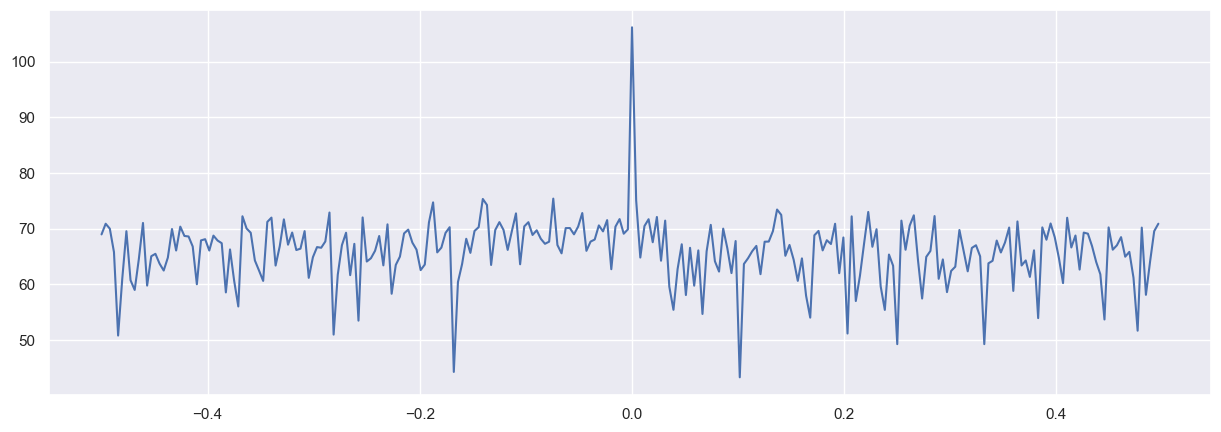

In [98]:
power, freq = fft_filter(data_IF[:,0],0,plot = True)

In [99]:
data_range_fft = np.fft.fft(data_IF, axis=1,n=512)
#data_range_fft = np.fft.fftshift(data_range_fft, axes=1)

data_abs = np.abs(data_range_fft)
df =pd.DataFrame(data_abs)



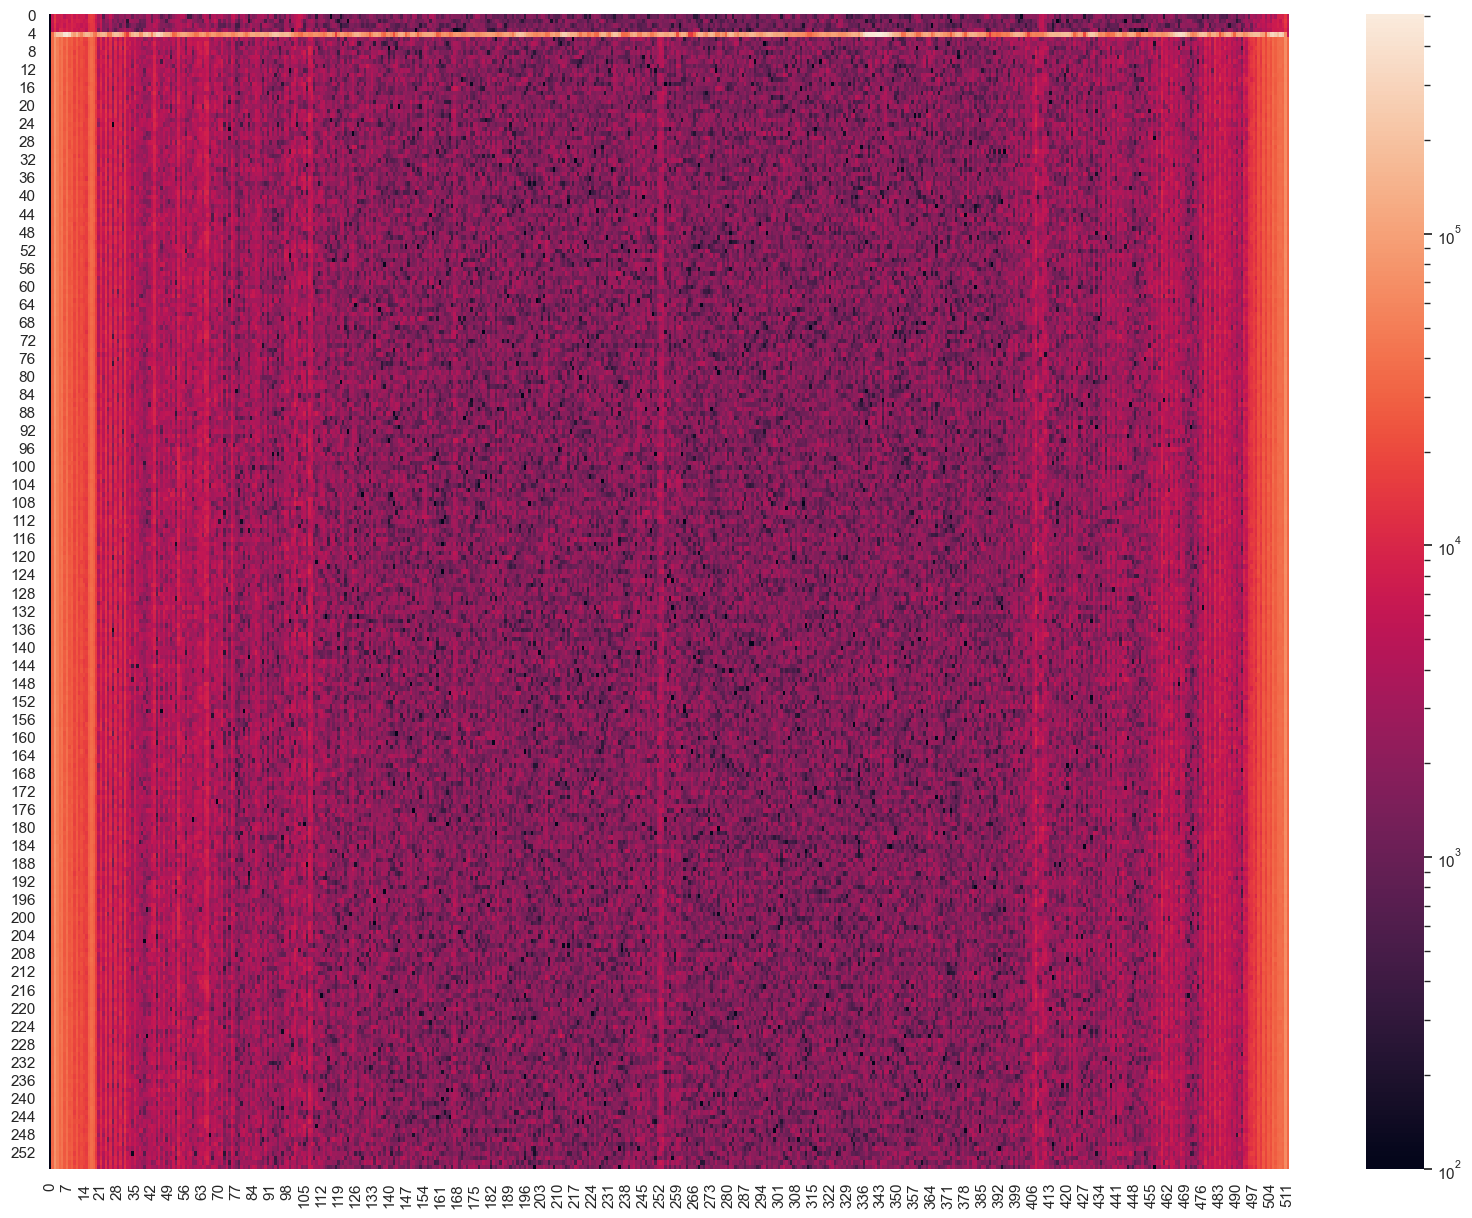

In [100]:
ax = sns.heatmap(data_abs,norm =LogNorm(vmin=100))

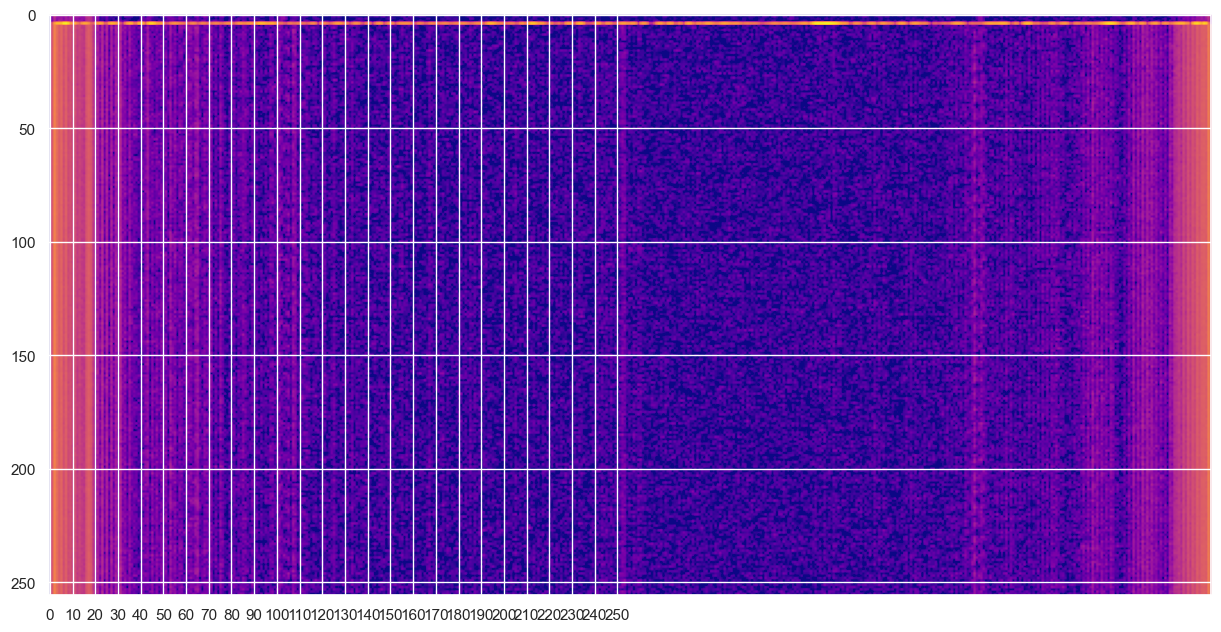

In [101]:
plt.figure(figsize=(15,15))
plt.imshow(data_abs, cmap='plasma',norm =LogNorm(vmin=1000))
plt.xticks(np.arange(0, 256, 10))
plt.show()

In [102]:
data_doppler_fft = np.fft.fft(data_range_fft, axis=0, n= 1024)
data_doppler_fft = np.fft.fftshift(data_doppler_fft, axes=0)
data_abs = np.abs(data_doppler_fft)
df =pd.DataFrame(data_abs)


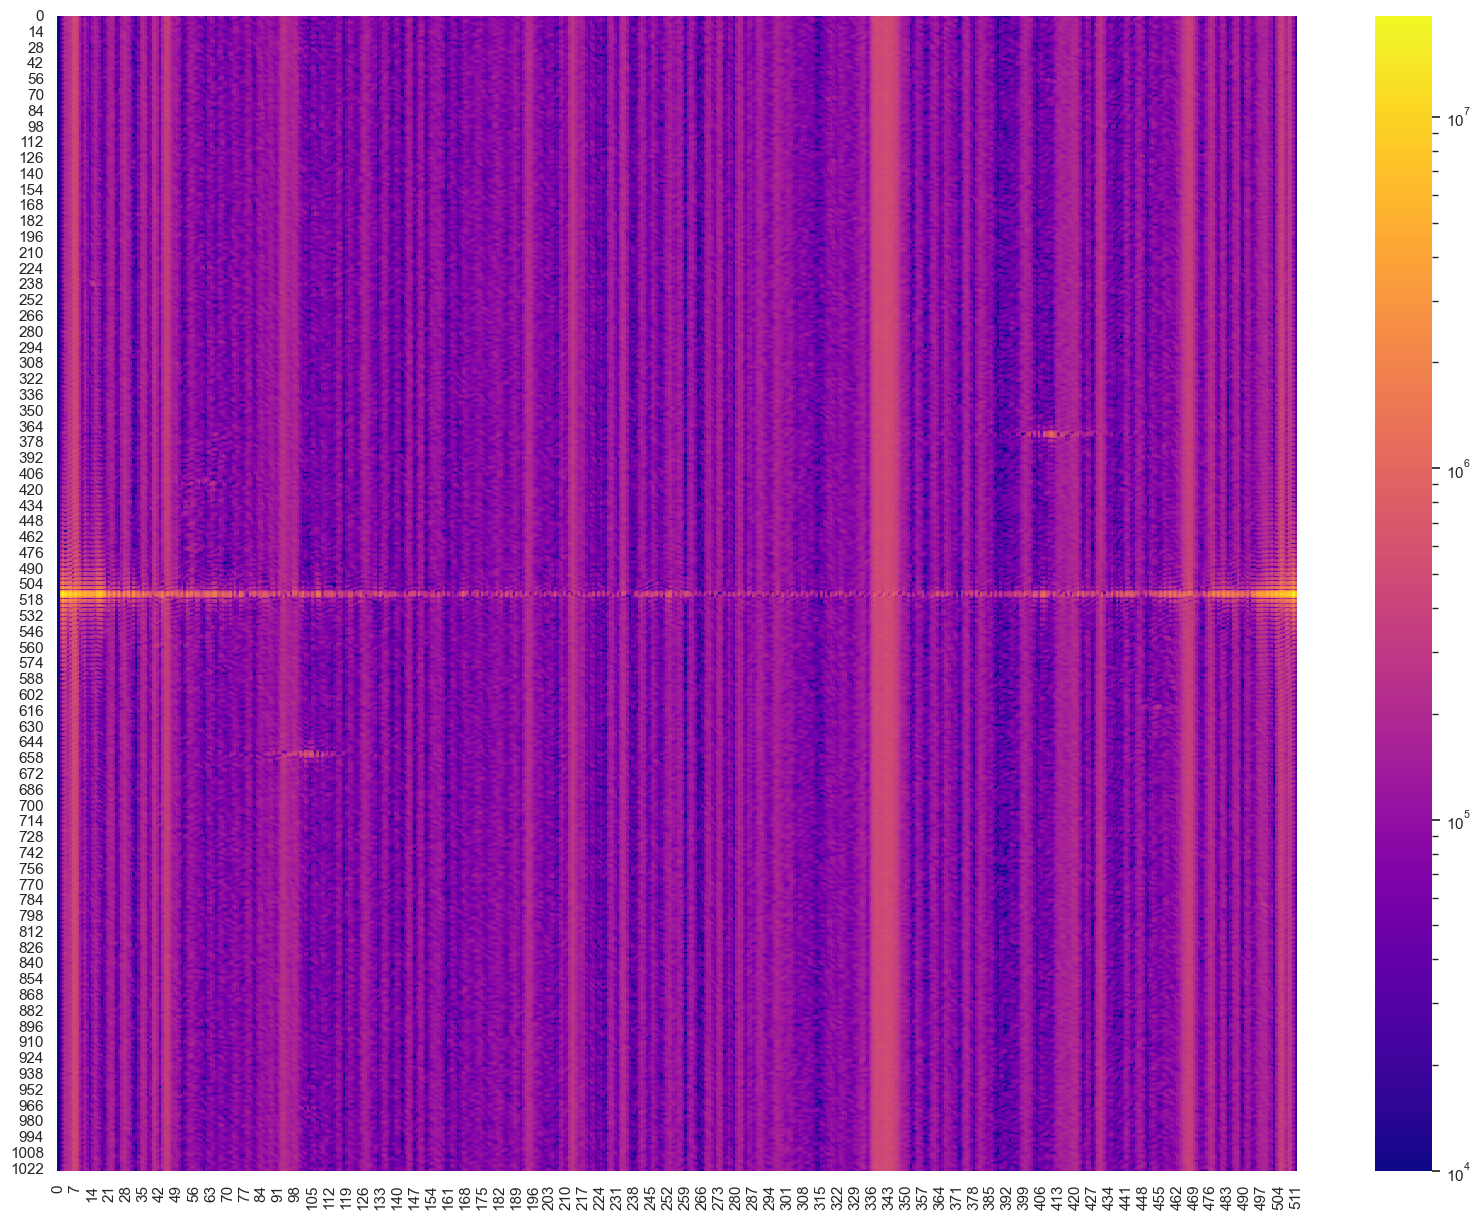

In [103]:
ax = sns.heatmap(data_abs,norm =LogNorm(vmin=10000),cmap='plasma')

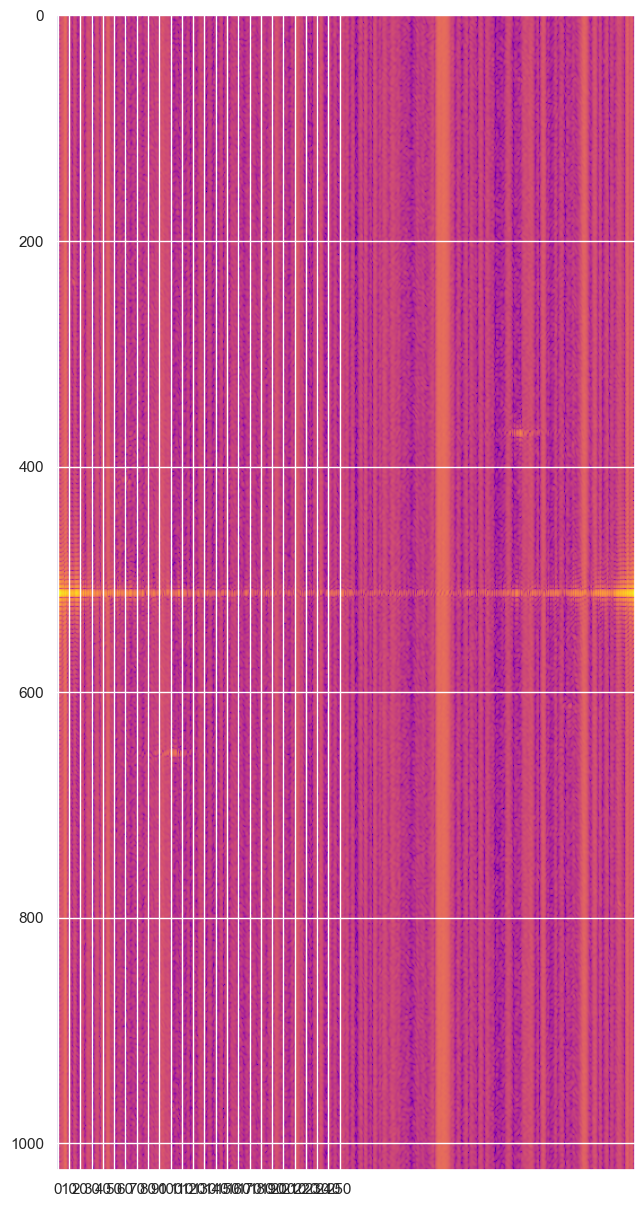

In [104]:
plt.figure(figsize=(15,15))
plt.imshow(data_abs, cmap='plasma',norm =LogNorm(vmin=1000))
plt.xticks(np.arange(0, 256, 10))
plt.show()

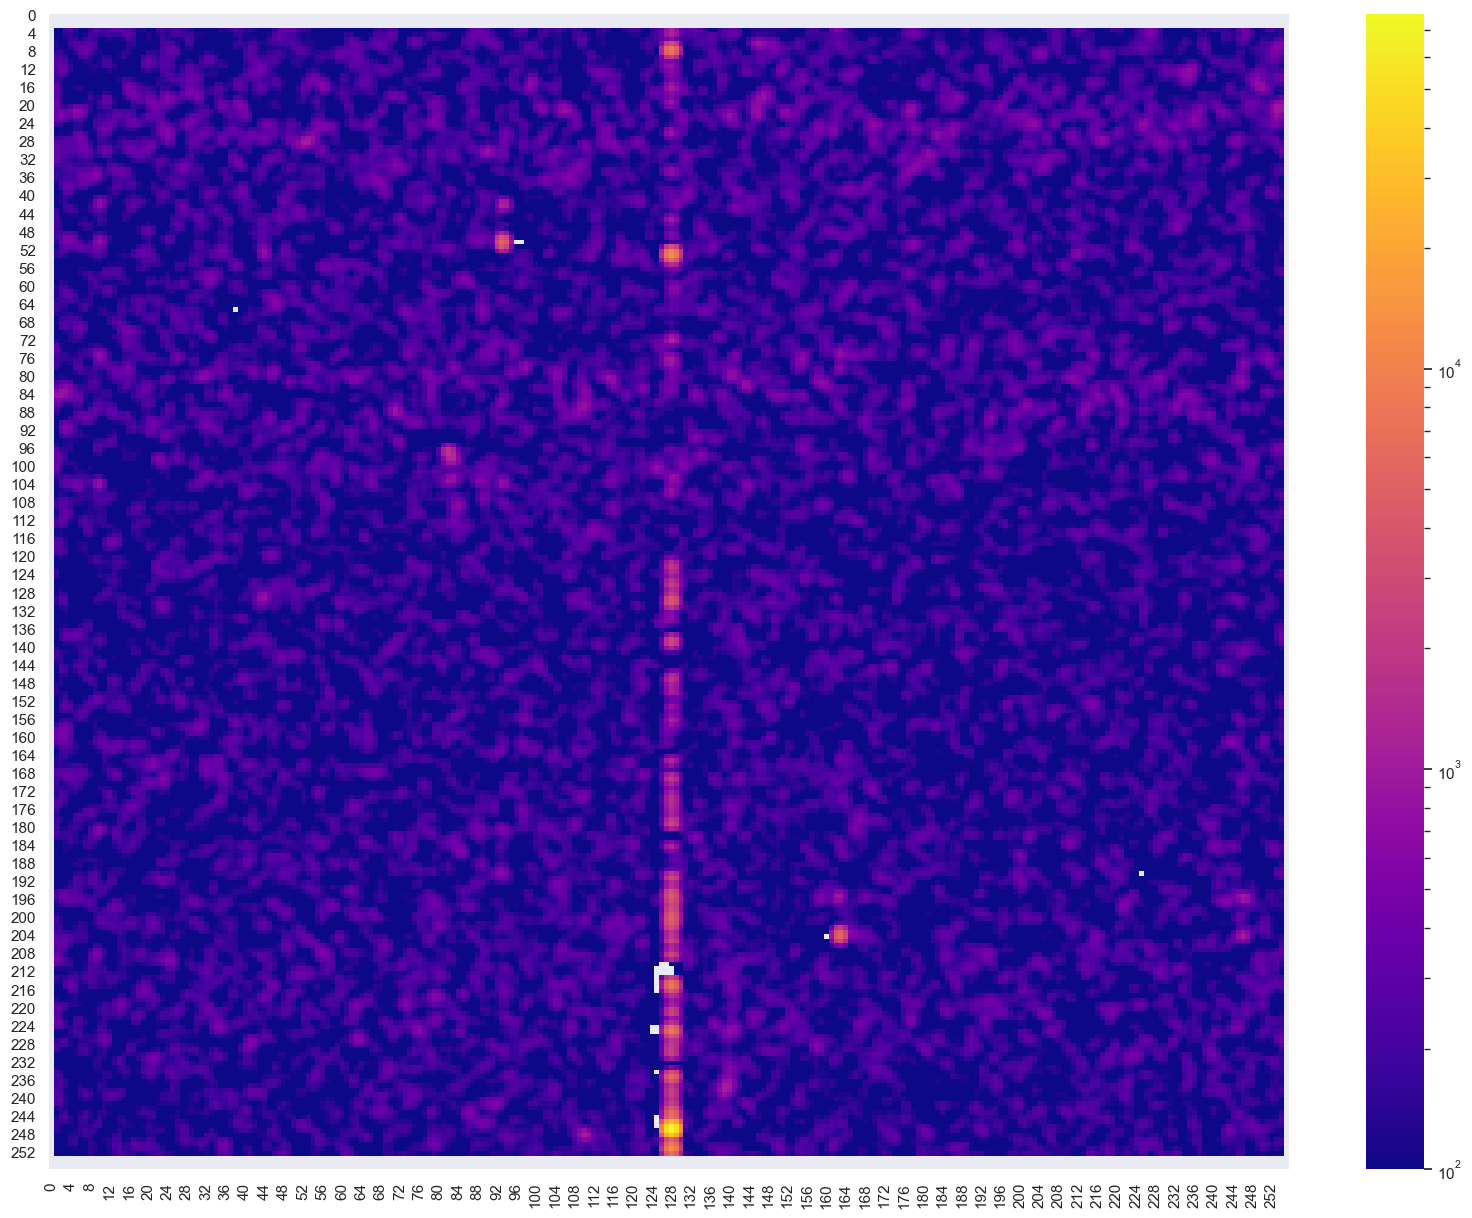

In [105]:
sns.set(rc={'figure.figsize':(20,15)})

ax = sns.heatmap(data_RMRD,norm =LogNorm(vmin=100),cmap='plasma')

## Calculate 2d-fft

# Theory


## Spatial Doppler signal

$$
\begin{align}
y[l,m] = Aexp(-j\frac{4\pi}{\lambda}R_l)exp(-j2\pi\frac{2v}{\lambda}mT)
\end{align}
$$

Sampling rate fast time or range dim: bandwidth of the radar. this will in most cases corespond the the chirp width.

B = 191.0153846 MHz (from the datasheet) 



$$f_{max}-f_{min} = KT_r$$

The frequency is swept linearly with a positive slope of K and a duration of 𝑇𝑟

L = range bins (number of samples in the range dimension)
L = 256

M= doppler bins (number of samples in the doppler dimension)

PRI = Pulse Repetition Interval = T = 12 core clocks

PRF = Pulse Repetition Frequency = 1/T = 83.3333333 MHz

CPI = Coherent Processing Interval
The total amount of time MT represented by the data matrix is called the coherent processing interval

## The slow-time
The sampling rate ofslow time is PFR

Each row of the matrix represents a series of measurements from the same range bin over M successive pulses

M = number of successive pulses

$$f_d = 2v/\lambda$$

The slow-time or pulse number dimension (horizontal in the figure) is sampled at the pulse repetition interval (PRI) T of the radar. Thus, the sampling rate in this dimension is the pulse repetition frequency (PRF).

The total amount of time MT represented by the data matrix is called the coherent processing interval (CPI)